#PRÁCTICA ANÁLISIS DE DATOS



La variable target, la que se quiere estudiar y predecir, es la readmisión
de pacientes con diabetes (factores que influyen en el reingreso del
paciente). Está compuesta por
tres categorías (NO, <30 y >30)


##Identificación de variables, adaptación del tipo

In [ ]:
import numpy as np
import pandas as pd #para Tablas

#Se cargan los datos y se muestra el conjunto de datos
diabetic_data = pd.read_csv("diabetic_data.csv")
diabetic_data.replace("?", np.nan, inplace=True) #Se pone NaN en los lugares con interrogaciones
display(diabetic_data) # mostrar los datos

#Identifica el tipo de cada variable
display(diabetic_data.dtypes)

#display(diabetic_data.isnull().any())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
# CONVERTIR DE OBJECT A CATEGORY
object_data = diabetic_data.select_dtypes([object]) #se cogen todas las colum de tipo object

for columna in object_data.columns:
  diabetic_data[columna] = diabetic_data[columna].astype("category") #se cambia el tipo a category

diabetic_data.dtypes #comprobación de que se ha cambiado

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

In [ ]:
# Ve categorias de la variable categórica
#data["gender"]

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

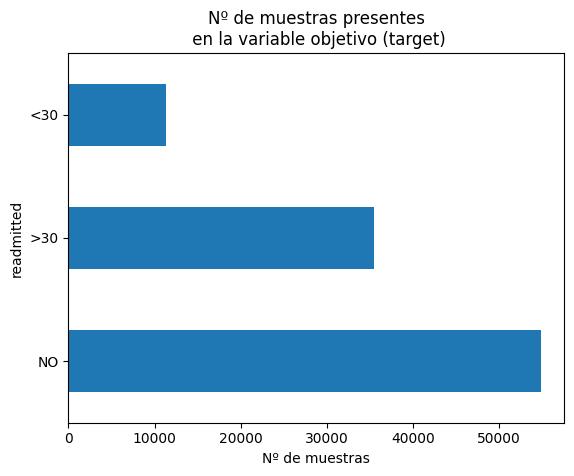

In [ ]:
# DIVIDIR DATOS
target = diabetic_data["readmitted"] # Variable target. Desequilibrio
data = diabetic_data.drop(columns = ["readmitted"]) # Datos sin la colum target
categorical_data = data.select_dtypes(["category"]) # Las tipo categoricas

# Revisar clases que existen en la variable target
import matplotlib.pyplot as plt

target.value_counts().plot.barh()
plt.xlabel("Nº de muestras")
_ = plt.title("Nº de muestras presentes\n en la variable objetivo (target)")
target.value_counts()


*   Se puede ver que la variable target está compuesta por 3 categorías

In [ ]:
#data.info()

In [ ]:
from multiprocessing import Value
import math
# SEGMENTACIÓN DE LOS DIAGNÓSTICOS
import pandas as pd

def recodificar(value):
    if pd.isna(value) or value == "":
        return np.nan
    else:
        try:
            value = float(value)
            if math.isnan(value):
                return "NaN"
            elif value >= 1 and value <= 139:
                return 'Enfermedades infecciosas/parasitarias'
            elif value >= 140 and value <= 239:
                return 'Neoplasia'
            elif value >= 240 and value <= 279:
                return 'Enfermedades endocrina/nutricional/metabólica/inmunológica'
            elif value >= 280 and value <= 289:
                return 'Enfermedades de la sangre'
            elif value >= 290 and value <= 319:
                return 'Desordenes mentales'
            elif value >= 320 and value <= 389:
                return 'Enfermedades sistema nervioso'
            elif value >= 390 and value <= 459:
                return 'Enfermedades sistema circulatorio'
            elif value >= 460 and value <= 519:
                return 'Enfermedades sistema respiratorio'
            elif value >= 520 and value <= 579:
                return 'Enfermedades sistema digestivo'
            elif value >= 580 and value <= 629:
                return 'Enfermedades sistema genitourinario'
            elif value >= 630 and value <= 679:
                return 'Complicaciones embarazo/parto'
            elif value >= 680 and value <= 709:
                return 'Enfermedades piel'
            elif value >= 710 and value <= 739:
                return 'Enfermedades sistema musculoesqueletico'
            elif value >= 740 and value <= 759:
                return 'Anomalias congenitas'
            elif value >= 760 and value <= 779:
                return 'Periodo perinatal'
            elif value >= 780 and value <= 799:
                return 'Sintomas mal definidos'
            elif value >= 800 and value <= 999:
                return 'Lesiones/envenenamiento'
        except ValueError:
            return "Factores influyentes en estado salud/contacto servicios sanitarios" # Si no se puede convertir a flotante, devuelve el valor original

In [ ]:
diag_columns = ["diag_1", "diag_2", "diag_3"]
data[diag_columns] = data[diag_columns].applymap(recodificar) # Llamar a la función para recodificar los segmentos
data["diag_1"] = data["diag_1"].astype("category") #se cambia el tipo a category
data["diag_2"] = data["diag_2"].astype("category")
data["diag_3"] = data["diag_3"].astype("category")

In [ ]:
# ENCODING VARIABLES CATEGORICAS (asignas identificadores a cada categoria)
categorical_columns = categorical_data.columns
data_NoEncoding = data.copy() # Guarda una copia. No asignar data_Noencoding = data pq apuntan a la misma referencia y si cambia uno tmb lo hará el otro

for columna in categorical_columns:
  original_categories = data_NoEncoding[columna].cat.categories
  mapeo_dict = dict(enumerate(original_categories))
  #print(f"Mapeo columna {columna}: {mapeo_dict}")
  data[columna] = data[columna].cat.codes # ENCODING

# si el valor es NaN, se pone un -1
#data.dtypes

# COMPROBACIÓN DE QUE SE HA REALIZADO EL ENCODING
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,2,0,0,-1,6,25,1,1,...,0,0,1,1,0,0,0,0,1,0
1,149190,55629189,2,0,1,-1,1,1,7,3,...,0,0,3,1,0,0,0,0,0,1
2,64410,86047875,0,0,2,-1,1,1,7,2,...,0,0,1,1,0,0,0,0,1,1
3,500364,82442376,2,1,3,-1,1,1,7,2,...,0,0,3,1,0,0,0,0,0,1
4,16680,42519267,2,1,4,-1,1,1,7,1,...,0,0,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,-1,1,3,7,3,...,0,0,0,1,0,0,0,0,0,1
101762,443847782,74694222,0,0,8,-1,1,4,5,5,...,0,0,2,1,0,0,0,0,1,1
101763,443854148,41088789,2,1,7,-1,1,1,7,1,...,0,0,0,1,0,0,0,0,0,1
101764,443857166,31693671,2,0,8,-1,2,3,7,10,...,0,0,3,1,0,0,0,0,0,1


In [ ]:
# VER MAPEO DE UNA COLUMNA EN ESPECIFICO
"""original_categories = data_NoEncoding["gender"].cat.categories
mapeo_dict = dict(enumerate(original_categories))
print(f"Mapeo columna: {mapeo_dict}")"""

'original_categories = data_NoEncoding["gender"].cat.categories\nmapeo_dict = dict(enumerate(original_categories))\nprint(f"Mapeo columna: {mapeo_dict}")'

In [ ]:
# COMO REVERTIRLO
"""for columna in categorical_columns:
  original_categories = data_NoEncoding[columna].cat.categories
  data[columna] = data[columna].map(dict(enumerate(original_categories))) # Mapear los códigos numéricos a las categorías originales"""

'for columna in categorical_columns:\n  original_categories = data_NoEncoding[columna].cat.categories\n  data[columna] = data[columna].map(dict(enumerate(original_categories))) # Mapear los códigos numéricos a las categorías originales'

In [ ]:
# VER DISTRIBUCIÓN DE LAS CLASES DE CADA VARIABLE
#_ = data.hist(figsize=(20, 14))

##CLASIFICADORES (Preanálisis)

###Modelo base (DummyClassifier)

Se utiliza DummyClassifier como referencia básica (baseline) para luego compararlo con otros modelos más avanzados y sofisticados. Este predice usando la estrategia de la clase más frecuente en el conjunto de datos de entrenamiento. El porcentaje de aciertos de un sistema trivial es el porcentaje de veces que un clasificador que siempre predice la clase mayoritaria acertaría. Si el rendimiento de los modelos no supera este porcentaje significa que no están siendo útiles y se necesitan mejorar.

In [ ]:
# DIVISIÓN ÚNICA DE LOS DATOS
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0, test_size=0.5) #mitad de los datos serán de prueba y la otra de entrenamiento
                                #random_state=0: fija la semilla para la generación de números aleatorios, asegurando reproducibilidad.
# USO DEL DUMMY CLASSIFIER
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)

#La precisión se calcula comparando las predicciones del clasificador con las etiquetas reales y es una medida de qué tan bien el clasificador está prediciendo las etiquetas correctas.
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(data_test, target_test):.4f}")


"""from sklearn.metrics import recall_score, precision_score

predictions = dummy_classifier.predict(data_test)
precision = precision_score(target_test, predictions, average='weighted',zero_division=1) #Me da problemas, no predicciones + para una clase?
recall = recall_score(target_test, predictions, average='weighted')

print("PRECISIÓN: " + str(precision))
print("RECALL: " + str(recall))"""


Accuracy of the dummy classifier: 0.5410


'from sklearn.metrics import recall_score, precision_score\n\npredictions = dummy_classifier.predict(data_test)\nprecision = precision_score(target_test, predictions, average=\'weighted\',zero_division=1) #Me da problemas, no predicciones + para una clase?\nrecall = recall_score(target_test, predictions, average=\'weighted\')\n\nprint("PRECISIÓN: " + str(precision))\nprint("RECALL: " + str(recall))'

In [ ]:
#Se puede ver que se predice siempre la clase mas frecuente como salida
target_predictedD = dummy_classifier.predict(data_test)
target_predictedD[:5]

array(['NO', 'NO', 'NO', 'NO', 'NO'], dtype='<U2')

El clasificador sin aprender nada de los datos, es capaz de predecir
con una exactitud de: 54,1%. Como la clase está DESAJUSTADA (imbalanced) se debe tener en cuenta mejor la PRECISIÓN y SENSIBILIDAD (recall) en vez de la EXACTITUD.

In [ ]:
#Valor AUC para el DummyClassifier
from sklearn.metrics import roc_auc_score

# Probabilidades predichas por el Dummy Classifier
prob_predichas = dummy_classifier.predict_proba(data_test)

# Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
auc = roc_auc_score(target_test, prob_predichas, multi_class='ovr', average='macro')

print(f"AUC del Dummy Classifier: {auc:.3f}")

# auc = roc_auc_score(target_test == '>30', probas_prediccion)  # Si >30 es tu clase positiva

AUC del Dummy Classifier: 0.500


- Parámetro average = "macro" --> calcula el AUC para cada clase y luego toma el promedio de estos valores
- Parámetro multiclass = 'ovr' --> utiliza la estrategia one-vs-rest trata cada clase como la clase positiva en una comparación binaria con todas las demás clases agrupadas como la clase negativa.

###Regresión Logística

In [ ]:
# REGRESIÓN LOGÍSTICA.
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(data_train, target_train)

# Predicción con la ayuda de un clasificador entrenado
target_predicted = LR_classifier.predict(data_test)
target_predicted[:5]

array(['NO', 'NO', 'NO', 'NO', 'NO'], dtype=object)

In [ ]:
# COMPARACIÓN DE LAS PREDICCIONES CON LOS DATOS REALES
target_test == target_predicted # si es True, quiere decir q la predicción y valor real coinciden

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy del Logistic Regression: {accuracy:.4f}")

Accuracy del Logistic Regression: 0.5422


In [ ]:
# AUC de la Regresión Logística
# Probabilidades predichas
prob_predichasLR = LR_classifier.predict_proba(data_test)

# Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
auc = roc_auc_score(target_test, prob_predichasLR, multi_class='ovr', average='macro')

print(f"AUC del Dummy Classifier: {auc:.3f}")

AUC del Dummy Classifier: 0.533


###Árbol de decisión

In [ ]:
# ÁRBOL DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_classifier = DecisionTreeClassifier(max_depth=8)
DT_classifier.fit(data_train, target_train)
target_predicted = DT_classifier.predict(data_test)
accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy del Arbol de decisión: {accuracy:.4f}")

# Obtener la importancia de las características
#feature_importances = DT_classifier.feature_importances_

# Imprimir la importancia de cada característica
#for i, column in enumerate(data.columns):
#    print(f"Importancia de {column}: {feature_importances[i]}")

Accuracy del Arbol de decisión: 0.5819


In [ ]:
target_predicted[:5]
target_test[:5] == target_predicted[:5]

43462    False
33680     True
32406    False
89036    False
81398    False
Name: readmitted, dtype: bool

In [ ]:
# AUC del Decision Tree
# Probabilidades predichas
prob_predichasDT = DT_classifier.predict_proba(data_test)

# Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
auc = roc_auc_score(target_test, prob_predichasDT, multi_class='ovr', average='macro')

print(f"AUC del Arbol de Decision: {auc:.3f}")

AUC del Arbol de Decision: 0.653


###Random Forest

In [ ]:
# BOSQUE ALEATORIO
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
RF_classifier.fit(data_train, target_train)
target_predicted = RF_classifier.predict(data_test)
accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy del Arbol de decisión: {accuracy:.4f}")
target_predicted[:5]

Accuracy del Arbol de decisión: 0.5974


array(['NO', 'NO', 'NO', '>30', 'NO'], dtype=object)

In [ ]:
# AUC del Random Forest
# Probabilidades predichas
prob_predichasRF = RF_classifier.predict_proba(data_test)

# Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
auc = roc_auc_score(target_test, prob_predichasRF, multi_class='ovr', average='macro')

print(f"AUC del Random Forest: {auc:.3f}")

AUC del Random Forest: 0.687


##VALIDACIÓN CRUZADA DE LOS CLASIFICADORES




In [ ]:
# Validación sin haber eliminado filas, columnas, escalado...
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Clasificadores a evaluar
classifiers = {
    "Dummy Classifier": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "K NeighBors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

from sklearn.model_selection import StratifiedKFold

X = data
y = target
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

accuracies_list = {clf_name: [] for clf_name in classifiers}
aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []
    accuracy_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train) # Entrenar el clasificador con el conjunto de entrenamiento

        y_pred = clf.predict_proba(X_test) # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accurancy
        accuracy = clf.score(X_test, y_test)
        accuracy_list.append(round(accuracy, 4))

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    accuracies_list[clf_name] = accuracy_list
    aucs_list[clf_name] = auc_list
    mean_auc = np.mean(auc_list) # Precisión media de los 10 folds
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")
    print(f"Mean Accuracy for {clf_name}: {round(mean_accuracy, 4)} ")


Classifier: Dummy Classifier
  Fold 0: AUC = 0.5 Accuracy = 0.5392
  Fold 1: AUC = 0.5 Accuracy = 0.5392
  Fold 2: AUC = 0.5 Accuracy = 0.5392
  Fold 3: AUC = 0.5 Accuracy = 0.5392
  Fold 4: AUC = 0.5 Accuracy = 0.5391
  Fold 5: AUC = 0.5 Accuracy = 0.5391
  Fold 6: AUC = 0.5 Accuracy = 0.5391
  Fold 7: AUC = 0.5 Accuracy = 0.5391
  Fold 8: AUC = 0.5 Accuracy = 0.5391
  Fold 9: AUC = 0.5 Accuracy = 0.5391
Mean AUC for Dummy Classifier: 0.5 
Mean Accuracy for Dummy Classifier: 0.5391 
Classifier: Logistic Regression
  Fold 0: AUC = 0.5272 Accuracy = 0.5416
  Fold 1: AUC = 0.5306 Accuracy = 0.5426
  Fold 2: AUC = 0.539 Accuracy = 0.5436
  Fold 3: AUC = 0.5407 Accuracy = 0.5443
  Fold 4: AUC = 0.5364 Accuracy = 0.5415
  Fold 5: AUC = 0.5338 Accuracy = 0.5387
  Fold 6: AUC = 0.5385 Accuracy = 0.538
  Fold 7: AUC = 0.5338 Accuracy = 0.5443
  Fold 8: AUC = 0.538 Accuracy = 0.5417
  Fold 9: AUC = 0.531 Accuracy = 0.5409
Mean AUC for Logistic Regression: 0.5349 
Mean Accuracy for Logistic Regr

In [ ]:
# Ejemplo del scikit-learn
"""from sklearn.model_selection import StratifiedKFold
X = data
y = target
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #random_satate permite la reproducibilidad
skf.get_n_splits(X, y)
print(skf)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")"""

'from sklearn.model_selection import StratifiedKFold\nX = data\ny = target\nskf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #random_satate permite la reproducibilidad\nskf.get_n_splits(X, y)\nprint(skf)\n\nfor i, (train_index, test_index) in enumerate(skf.split(X, y)):\n     print(f"Fold {i}:")\n     print(f"  Train: index={train_index}")\n     print(f"  Test:  index={test_index}")'

### MODIFICACIÓN DEL CONJUNTO DE DATOS Y ESCALADO

El objetivo de este apartado es modificar la estructura del conjunto de datos, eliminando instancias o características (columnas) que no son lo suficientemente relevantes, reagrupando, segmentando etc para poder incrementar el máximo posible el valor de AUC

In [ ]:
#diabetic_data

In [ ]:
# VER EL CONTEO DE VALORES DE CADA COLUMNA
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      99493 non-null   category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    3197 non-null    category
 6   admission_type_id         101766 non-null  int64   
 7   discharge_disposition_id  101766 non-null  int64   
 8   admission_source_id       101766 non-null  int64   
 9   time_in_hospital          101766 non-null  int64   
 10  payer_code                61510 non-null   category
 11  medical_specialty         51817 non-null   category
 12  num_lab_procedures        101766 non-null  int64   
 13  num_procedures            101


*   rosiglitazone, pioglitazone, glyburide, glipizide, glimepiride, metformin, repaglinide, nateglinide

In [ ]:
#diabetic_data["glyburide-metformin"]
#print(diabetic_data["encounter_id"].value_counts())
#print(diabetic_data["patient_nbr"].value_counts())
#diabetic_data["diabetesMed"].value_counts().plot.barh()
#plt.xlabel("Nº de muestras")
#_ = plt.title("Nº de muestras presentes\n en la variable objetivo (target)")
print(diabetic_data["chlorpropamide"].value_counts())
print(diabetic_data["glyburide-metformin"].value_counts())
print(diabetic_data["tolazamide"].value_counts())
print(diabetic_data["miglitol"].value_counts())
print(diabetic_data["acarbose"].value_counts())
print(diabetic_data["nateglinide"].value_counts())

chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64
glyburide-metformin
No        101060
Steady       692
Up             8
Down           6
Name: count, dtype: int64
tolazamide
No        101727
Steady        38
Up             1
Name: count, dtype: int64
miglitol
No        101728
Steady        31
Down           5
Up             2
Name: count, dtype: int64
acarbose
No        101458
Steady       295
Up            10
Down           3
Name: count, dtype: int64
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64


In [ ]:
# ELIMINACIÓN DE COLUMNAS
target2 = diabetic_data["readmitted"] # Variable target.
data2 = diabetic_data.drop(columns = ["readmitted", "patient_nbr","encounter_id", "weight", "max_glu_serum",
                                      "citoglipton", "examide","troglitazone", "metformin-pioglitazone",
                                      "metformin-rosiglitazone","glimepiride-pioglitazone","glipizide-metformin",
                                      "tolbutamide", "acetohexamide", "tolazamide", "miglitol",
                                      "chlorpropamide"])


# ELIMINACIÓN FILAS (las q tengan + de 2 nulos)
import pandas as pd
rows_to_drop = data2[data2.isnull().sum(axis=1) > 2].index

data2 = data2.drop(index=rows_to_drop)# Eliminar las filas identificadas tanto de data como de target
target2 = target2.drop(index=rows_to_drop)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85823 entries, 9 to 101764
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      84848 non-null  category
 1   gender                    85823 non-null  category
 2   age                       85823 non-null  category
 3   admission_type_id         85823 non-null  int64   
 4   discharge_disposition_id  85823 non-null  int64   
 5   admission_source_id       85823 non-null  int64   
 6   time_in_hospital          85823 non-null  int64   
 7   payer_code                60409 non-null  category
 8   medical_specialty         51010 non-null  category
 9   num_lab_procedures        85823 non-null  int64   
 10  num_procedures            85823 non-null  int64   
 11  num_medications           85823 non-null  int64   
 12  number_outpatient         85823 non-null  int64   
 13  number_emergency          85823 non-null  int64   

In [ ]:
# SEGMENTACIÓN DE LOS DIAGNÓSTICOS
#print(diabetic_data["diag_1"].value_counts())

diag_columns = ["diag_1", "diag_2", "diag_3"]
data2[diag_columns] = data2[diag_columns].applymap(recodificar) # Llamar a la función para recodificar los segmentos


In [ ]:
data2["diag_1"] = data2["diag_1"].astype("category") #se cambia el tipo a category
data2["diag_2"] = data2["diag_2"].astype("category")
data2["diag_3"] = data2["diag_3"].astype("category")

In [ ]:
# Encoding
categorical_data2 = data2.select_dtypes(["category"]) # Las tipo categoricas
categorical_columns2 = categorical_data2.columns
data_NoEncoding2 = data2.copy() # Guarda una copia. No asignar data_Noencoding = data pq apuntan a la misma referencia y si cambia uno tmb lo hará el otro

for columna in categorical_columns2:
  original_categories2 = data_NoEncoding2[columna].cat.categories
  mapeo_dict2 = dict(enumerate(original_categories2))
  print(f"Mapeo columna {columna}: {mapeo_dict2}")
  data2[columna] = data2[columna].cat.codes # ENCODING

# si el valor es NaN, se pone un -1
#data.dtypes

# COMPROBACIÓN DE QUE SE HA REALIZADO EL ENCODING
data2

Mapeo columna race: {0: 'AfricanAmerican', 1: 'Asian', 2: 'Caucasian', 3: 'Hispanic', 4: 'Other'}
Mapeo columna gender: {0: 'Female', 1: 'Male', 2: 'Unknown/Invalid'}
Mapeo columna age: {0: '[0-10)', 1: '[10-20)', 2: '[20-30)', 3: '[30-40)', 4: '[40-50)', 5: '[50-60)', 6: '[60-70)', 7: '[70-80)', 8: '[80-90)', 9: '[90-100)'}
Mapeo columna payer_code: {0: 'BC', 1: 'CH', 2: 'CM', 3: 'CP', 4: 'DM', 5: 'FR', 6: 'HM', 7: 'MC', 8: 'MD', 9: 'MP', 10: 'OG', 11: 'OT', 12: 'PO', 13: 'SI', 14: 'SP', 15: 'UN', 16: 'WC'}
Mapeo columna medical_specialty: {0: 'AllergyandImmunology', 1: 'Anesthesiology', 2: 'Anesthesiology-Pediatric', 3: 'Cardiology', 4: 'Cardiology-Pediatric', 5: 'DCPTEAM', 6: 'Dentistry', 7: 'Dermatology', 8: 'Emergency/Trauma', 9: 'Endocrinology', 10: 'Endocrinology-Metabolism', 11: 'Family/GeneralPractice', 12: 'Gastroenterology', 13: 'Gynecology', 14: 'Hematology', 15: 'Hematology/Oncology', 16: 'Hospitalist', 17: 'InfectiousDiseases', 18: 'InternalMedicine', 19: 'Nephrology', 20

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed
9,2,0,9,3,3,4,12,-1,18,33,...,1,1,1,1,2,1,2,1,0,1
12,2,0,4,1,3,7,7,-1,11,60,...,1,1,1,1,1,1,0,1,0,1
13,2,1,8,1,6,7,10,-1,11,55,...,1,1,1,1,1,1,2,1,1,1
17,2,0,5,1,1,7,3,-1,3,29,...,1,1,2,1,1,1,1,1,1,1
26,2,1,8,1,3,7,6,-1,3,64,...,1,1,2,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,6,1,1,7,6,4,-1,45,...,1,1,1,1,2,1,0,1,0,1
101761,0,1,7,1,3,7,3,7,-1,51,...,1,1,1,1,1,1,0,1,0,1
101762,0,0,8,1,4,5,5,7,-1,33,...,1,1,1,1,1,1,2,1,1,1
101763,2,1,7,1,1,7,1,7,-1,53,...,1,1,1,1,1,1,0,1,0,1


ESCALADO DE DATOS

In [ ]:
# ESCALAR CONJUNTO DE DATOS
from sklearn.preprocessing import StandardScaler

X = data2
y = target2

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "Dummy Classifier": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "K NeighBors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

accuracies_list = {clf_name: [] for clf_name in classifiers}
aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []
    accuracy_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train) # Entrenar el clasificador con el conjunto de entrenamiento escalado

        y_pred = clf.predict_proba(X_test) # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)
        accuracy_list.append(round(accuracy,4))

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    accuracies_list[clf_name] = accuracy_list
    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # AUC media de los 10 folds
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")
    print(f"Mean Accuracy for {clf_name}: {round(mean_accuracy, 4)} ")

Classifier: Dummy Classifier
  Fold 0: AUC = 0.5 Accuracy = 0.5358
  Fold 1: AUC = 0.5 Accuracy = 0.5358
  Fold 2: AUC = 0.5 Accuracy = 0.5358
  Fold 3: AUC = 0.5 Accuracy = 0.5359
  Fold 4: AUC = 0.5 Accuracy = 0.5359
  Fold 5: AUC = 0.5 Accuracy = 0.5358
  Fold 6: AUC = 0.5 Accuracy = 0.5358
  Fold 7: AUC = 0.5 Accuracy = 0.5358
  Fold 8: AUC = 0.5 Accuracy = 0.5358
  Fold 9: AUC = 0.5 Accuracy = 0.5358
Mean AUC for Dummy Classifier: 0.5 
Mean Accuracy for Dummy Classifier: 0.5358 
Classifier: Logistic Regression
  Fold 0: AUC = 0.6415 Accuracy = 0.5661
  Fold 1: AUC = 0.6429 Accuracy = 0.5718
  Fold 2: AUC = 0.6385 Accuracy = 0.5715
  Fold 3: AUC = 0.6444 Accuracy = 0.5732
  Fold 4: AUC = 0.6345 Accuracy = 0.5674
  Fold 5: AUC = 0.6296 Accuracy = 0.5675
  Fold 6: AUC = 0.6403 Accuracy = 0.5676
  Fold 7: AUC = 0.6414 Accuracy = 0.5697
  Fold 8: AUC = 0.6397 Accuracy = 0.5657
  Fold 9: AUC = 0.6518 Accuracy = 0.5706
Mean AUC for Logistic Regression: 0.6405 
Mean Accuracy for Logistic 

###OVERSAMPLING

Una vez realizado el oversampling se vuelve a realizar una validación cruzada, con el objetivo de ver si se van mejorando los valores de AUC de los clasificadores.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K NeighBors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

#skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

accuracies_list = {clf_name: [] for clf_name in classifiers}
aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []
    accuracy_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Se aplica SMOTE solo en el conjunto de entrenamiento
        smote = SMOTE(random_state=0)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        clf.fit(X_train_resampled, y_train_resampled)  # Se entrena el clasificador con el conjunto de entrenamiento

        y_pred = clf.predict_proba(X_test)  # Se realizan las predicciones

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)
        accuracy_list.append(round(accuracy,4))

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    accuracies_list[clf_name] = accuracy_list
    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # Precisión media de los 10 folds
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")
    print(f"Mean Accuracy for {clf_name}: {round(mean_accuracy, 4)} ")

Classifier: Logistic Regression
  Fold 0: AUC = 0.6363 Accuracy = 0.4807
  Fold 1: AUC = 0.6362 Accuracy = 0.4766
  Fold 2: AUC = 0.629 Accuracy = 0.4679
  Fold 3: AUC = 0.6365 Accuracy = 0.4749
  Fold 4: AUC = 0.6251 Accuracy = 0.473
  Fold 5: AUC = 0.6242 Accuracy = 0.4598
  Fold 6: AUC = 0.632 Accuracy = 0.4674
  Fold 7: AUC = 0.6335 Accuracy = 0.4774
  Fold 8: AUC = 0.6333 Accuracy = 0.4786
  Fold 9: AUC = 0.6434 Accuracy = 0.4872
Mean AUC for Logistic Regression: 0.6329 
Mean Accuracy for Logistic Regression: 0.4744 
Classifier: K NeighBors
  Fold 0: AUC = 0.5627 Accuracy = 0.3784
  Fold 1: AUC = 0.5674 Accuracy = 0.3904
  Fold 2: AUC = 0.5527 Accuracy = 0.3653
  Fold 3: AUC = 0.5631 Accuracy = 0.374
  Fold 4: AUC = 0.5549 Accuracy = 0.3758
  Fold 5: AUC = 0.5588 Accuracy = 0.3775
  Fold 6: AUC = 0.5587 Accuracy = 0.3746
  Fold 7: AUC = 0.5615 Accuracy = 0.378
  Fold 8: AUC = 0.5621 Accuracy = 0.3728
  Fold 9: AUC = 0.5563 Accuracy = 0.3707
Mean AUC for K NeighBors: 0.5598 
Mean A

In [ ]:
# Comprobar AUC después de quitar filas con valores nulos, HACER + TARDE
"""import pandas as pd

# Supongamos que df es tu DataFrame
# Verificar valores nulos en cada fila
filas_con_nulos = data_deleteCol.isna().any(axis=1)

# Obtener las filas que tienen al menos un valor nulo
filas_con_nulos = data_deleteCol[filas_con_nulos]

# Imprimir las filas que contienen valores nulos
print("Filas con valores nulos:")
print(filas_con_nulos)"""

'import pandas as pd\n\n# Supongamos que df es tu DataFrame\n# Verificar valores nulos en cada fila\nfilas_con_nulos = data_deleteCol.isna().any(axis=1)\n\n# Obtener las filas que tienen al menos un valor nulo\nfilas_con_nulos = data_deleteCol[filas_con_nulos]\n\n# Imprimir las filas que contienen valores nulos\nprint("Filas con valores nulos:")\nprint(filas_con_nulos)'

###UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K NeighBors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

#skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

accuracies_list = {clf_name: [] for clf_name in classifiers}
aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []
    accuracy_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar submuestreo solo en el conjunto de entrenamiento
        undersampler = RandomUnderSampler(random_state=0)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        clf.fit(X_train_resampled, y_train_resampled)  # Entrenar el clasificador con el conjunto de entrenamiento

        y_pred = clf.predict_proba(X_test)  # Realizar predicciones en el conjunto de pr

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)
        accuracy_list.append(round(accuracy,4))

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    accuracies_list[clf_name] = accuracy_list
    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # Precisión media de los 10 folds
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")
    print(f"Mean Accuracy for {clf_name}: {round(mean_accuracy, 4)} ")

Classifier: Logistic Regression
  Fold 0: AUC = 0.6382 Accuracy = 0.4902
  Fold 1: AUC = 0.6372 Accuracy = 0.4886
  Fold 2: AUC = 0.633 Accuracy = 0.477
  Fold 3: AUC = 0.6374 Accuracy = 0.4766
  Fold 4: AUC = 0.6292 Accuracy = 0.4818
  Fold 5: AUC = 0.6287 Accuracy = 0.4731
  Fold 6: AUC = 0.6326 Accuracy = 0.4762
  Fold 7: AUC = 0.636 Accuracy = 0.4874
  Fold 8: AUC = 0.6364 Accuracy = 0.4931
  Fold 9: AUC = 0.646 Accuracy = 0.4956
Mean AUC for Logistic Regression: 0.6355 
Mean Accuracy for Logistic Regression: 0.484 
Classifier: K NeighBors
  Fold 0: AUC = 0.5623 Accuracy = 0.3425
  Fold 1: AUC = 0.5701 Accuracy = 0.3522
  Fold 2: AUC = 0.5605 Accuracy = 0.3396
  Fold 3: AUC = 0.5641 Accuracy = 0.3469
  Fold 4: AUC = 0.5618 Accuracy = 0.3448
  Fold 5: AUC = 0.5659 Accuracy = 0.3454
  Fold 6: AUC = 0.5561 Accuracy = 0.3365
  Fold 7: AUC = 0.562 Accuracy = 0.3415
  Fold 8: AUC = 0.5763 Accuracy = 0.3535
  Fold 9: AUC = 0.5642 Accuracy = 0.3437
Mean AUC for K NeighBors: 0.5643 
Mean Ac

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Definir clasificadores
classifiers3 = {
    "K NeighBors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

X = data2
y = target2
j = 15  # Variable contador para cambiar el nombre de la lista dnd se almacenan las accurancy de cada clasi (sus 10 folds)

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)  # Crear un objeto StratifiedKFold, 10 folds

for clf_name, clf in classifiers3.items():  # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    exec(f"auc_list{j} = []")
    print(f"auc_list{j} = []")

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
        y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]

        # Aplicar submuestreo solo en el conjunto de entrenamiento
        undersampler = RandomUnderSampler(random_state=0)
        X_train2_resampled, y_train2_resampled = undersampler.fit_resample(X_train2, y_train2)

        clf.fit(X_train2_resampled, y_train2_resampled)  # Entrenar el clasificador con el conjunto de entrenamiento

        y_pred2 = clf.predict_proba(X_test2)  # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test2, y_pred2, multi_class='ovr', average='macro')
        exec(f"auc_list{j}.append(auc)")

        print(f"  Fold {i}: AUC = {round(auc, 4)}")  # Imprimir la precisión del clasificador

    mean_auc2 = np.mean(eval(f"auc_list{j}"))  # AUC media de los 10 folds
    print(f"Mean AUC for {clf_name}: {round(mean_auc2, 4)} ")
    j = j + 1

Classifier: K NeighBors
auc_list15 = []
  Fold 0: AUC = 0.5505
  Fold 1: AUC = 0.5588
  Fold 2: AUC = 0.5522
  Fold 3: AUC = 0.5571
  Fold 4: AUC = 0.5552
  Fold 5: AUC = 0.5489
  Fold 6: AUC = 0.5521
  Fold 7: AUC = 0.5559
  Fold 8: AUC = 0.5505
  Fold 9: AUC = 0.5597
Mean AUC for K NeighBors: 0.5541 
Classifier: Decision Tree
auc_list16 = []
  Fold 0: AUC = 0.6238
  Fold 1: AUC = 0.6326
  Fold 2: AUC = 0.6264
  Fold 3: AUC = 0.6331
  Fold 4: AUC = 0.6285
  Fold 5: AUC = 0.6274
  Fold 6: AUC = 0.63
  Fold 7: AUC = 0.6298
  Fold 8: AUC = 0.6383
  Fold 9: AUC = 0.6353
Mean AUC for Decision Tree: 0.6305 
Classifier: Random Forest
auc_list17 = []
  Fold 0: AUC = 0.6556
  Fold 1: AUC = 0.6632
  Fold 2: AUC = 0.6585
  Fold 3: AUC = 0.6601
  Fold 4: AUC = 0.6628
  Fold 5: AUC = 0.6593
  Fold 6: AUC = 0.6613
  Fold 7: AUC = 0.6564
  Fold 8: AUC = 0.6603
  Fold 9: AUC = 0.6566
Mean AUC for Random Forest: 0.6594 
Classifier: Gradient Boosting
auc_list18 = []
  Fold 0: AUC = 0.6712
  Fold 1: AUC

###MODIFICACIÓN MANUAL PARÁMETROS CLASIFICADORES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "Logistic Regression": LogisticRegression(C=0.1, solver="newton-cg", penalty="l2"),
    "K NeighBors": KNeighborsClassifier(n_neighbors=4, weights="uniform", algorithm="auto"),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split =3, min_samples_leaf=2, max_features=10),
    "Random Forest": RandomForestClassifier(n_estimators=100,max_depth=8, min_samples_split =3, min_samples_leaf=2, max_features=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=8, min_samples_split =3, min_samples_leaf=2)
}

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train) # Entrenar el clasificador con el conjunto de entrenamiento escalado

        y_pred = clf.predict_proba(X_test) # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # AUC media de los 10 folds

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")

Classifier: Logistic Regression
  Fold 0: AUC = 0.6415 Accuracy = 0.5661
  Fold 1: AUC = 0.6429 Accuracy = 0.5719
  Fold 2: AUC = 0.6384 Accuracy = 0.5715
  Fold 3: AUC = 0.6444 Accuracy = 0.5732
  Fold 4: AUC = 0.6345 Accuracy = 0.5674
  Fold 5: AUC = 0.6296 Accuracy = 0.5675
  Fold 6: AUC = 0.6403 Accuracy = 0.5676
  Fold 7: AUC = 0.6414 Accuracy = 0.5697
  Fold 8: AUC = 0.6397 Accuracy = 0.5657
  Fold 9: AUC = 0.6518 Accuracy = 0.5705
Mean AUC for Logistic Regression: 0.6404 
Classifier: K NeighBors
  Fold 0: AUC = 0.5715 Accuracy = 0.4863
  Fold 1: AUC = 0.5701 Accuracy = 0.4805
  Fold 2: AUC = 0.5612 Accuracy = 0.475
  Fold 3: AUC = 0.5731 Accuracy = 0.4908
  Fold 4: AUC = 0.5609 Accuracy = 0.4775
  Fold 5: AUC = 0.5697 Accuracy = 0.4788
  Fold 6: AUC = 0.5669 Accuracy = 0.4821
  Fold 7: AUC = 0.5695 Accuracy = 0.4809
  Fold 8: AUC = 0.5691 Accuracy = 0.4842
  Fold 9: AUC = 0.5645 Accuracy = 0.4811
Mean AUC for K NeighBors: 0.5676 
Classifier: Decision Tree
  Fold 0: AUC = 0.6414 

###GRID SEARCH CV

Ahora se modifican manualamente algunos parámetros de los clasificadores para ver si así se puede mejorar su AUC. En primer lugar, se estudia con GridsearchCV cuáles son los hiperparámetros más óptimos.

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador DecisionTree
classifier = DecisionTreeClassifier()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 8, 9, 10], # profundidad árbol, desde la rís a hoja + lejana
    'min_samples_split': [2, 5, 10], # nº min muestras para dividir un nodo interno
    'min_samples_leaf': [2, 3, 5, 6] # nº min requerido para ser una hoja
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='roc_auc_ovr')

# Realizar la búsqueda en la cuadrícula con los datos escalados
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Resultados Árbol de Decisión
* Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.6473931537787607




In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador RandomForest
classifier = RandomForestClassifier()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='roc_auc_ovr')

# Realizar la búsqueda en la cuadrícula con los datos escalados
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation AUC score:", best_score)

Resultados Random Forest
* Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation AUC score: 0.6698418377114159

In [ ]:
# KNeigbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador DecisionTree
classifier = KNeighborsClassifier()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de peso para los vecinos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmo utilizado para calcular los vecinos
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='roc_auc_ovr')

# Realizar la búsqueda en la cuadrícula con los datos escalados
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Resultados Vecinos más cercanos
* Best parameters: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.5779879905657836

In [ ]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador DecisionTree
classifier = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el ensamble
    'max_depth': [4, 5, 6],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas para ser una hoja
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='roc_auc_ovr')

# Realizar la búsqueda en la cuadrícula con los datos escalados
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

#### Cross-validation
Con parámetros indicados como mejores por GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "K NeighBors": KNeighborsClassifier(algorithm="kd_tree", n_neighbors=9, weights="distance"),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=2, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=6, min_samples_split =5, min_samples_leaf=2)
}

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

accuracies_list = {clf_name: [] for clf_name in classifiers}
aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []
    accuracy_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train) # Entrenar el clasificador con el conjunto de entrenamiento escalado

        y_pred = clf.predict_proba(X_test) # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)
        accuracy_list.append(round(accuracy,4))

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    accuracies_list[clf_name] = accuracy_list
    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # Precisión media de los 10 folds
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")
    print(f"Mean Accuracy for {clf_name}: {round(mean_accuracy, 4)} ")

Classifier: K NeighBors
  Fold 0: AUC = 0.586 Accuracy = 0.5306
  Fold 1: AUC = 0.5924 Accuracy = 0.5362
  Fold 2: AUC = 0.5834 Accuracy = 0.5266
  Fold 3: AUC = 0.5904 Accuracy = 0.5389
  Fold 4: AUC = 0.5796 Accuracy = 0.5262
  Fold 5: AUC = 0.5893 Accuracy = 0.5316
  Fold 6: AUC = 0.5854 Accuracy = 0.5256
  Fold 7: AUC = 0.5849 Accuracy = 0.5361
  Fold 8: AUC = 0.5949 Accuracy = 0.5379
  Fold 9: AUC = 0.5829 Accuracy = 0.5337
Mean AUC for K NeighBors: 0.5869 
Mean Accuracy for K NeighBors: 0.5323 
Classifier: Decision Tree
  Fold 0: AUC = 0.6522 Accuracy = 0.5758
  Fold 1: AUC = 0.6572 Accuracy = 0.5733
  Fold 2: AUC = 0.65 Accuracy = 0.5779
  Fold 3: AUC = 0.6525 Accuracy = 0.574
  Fold 4: AUC = 0.6471 Accuracy = 0.575
  Fold 5: AUC = 0.6391 Accuracy = 0.566
  Fold 6: AUC = 0.6539 Accuracy = 0.5756
  Fold 7: AUC = 0.6563 Accuracy = 0.5749
  Fold 8: AUC = 0.645 Accuracy = 0.5698
  Fold 9: AUC = 0.6542 Accuracy = 0.5743
Mean AUC for Decision Tree: 0.6508 
Mean Accuracy for Decision T

#### Con parámetro class_weight

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=2, min_samples_split=2,class_weight="balanced"),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=6, min_samples_split =5, min_samples_leaf=2, class_weight="balanced")
}

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) # Crear un objeto StratifiedKFold, 10 folds

aucs_list = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items(): # Iterar sobre los clasificadores
    print(f"Classifier: {clf_name}")
    auc_list = []

    # Iterar sobre las divisiones de validación cruzada
    for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train) # Entrenar el clasificador con el conjunto de entrenamiento escalado

        y_pred = clf.predict_proba(X_test) # Realizar predicciones en el conjunto de prueba

        # Calcula el AUC, teniendo en cuenta la clasificación multiclase de target
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
        auc_list.append(round(auc,4))

        # Se calcula también el Accuracy
        accuracy = clf.score(X_test, y_test)

        print(f"  Fold {i}: AUC = {round(auc,4)} Accuracy = {round(accuracy,4)}") # Mostrar el AUC y Accuracy

    aucs_list[clf_name] = auc_list

    mean_auc = np.mean(auc_list) # AUC media de los 10 folds

    print(f"Mean AUC for {clf_name}: {round(mean_auc, 4)} ")

Classifier: Decision Tree
  Fold 0: AUC = 0.6491 Accuracy = 0.4865
  Fold 1: AUC = 0.6483 Accuracy = 0.4926
  Fold 2: AUC = 0.6465 Accuracy = 0.4872
  Fold 3: AUC = 0.6469 Accuracy = 0.4807
  Fold 4: AUC = 0.6438 Accuracy = 0.4516
  Fold 5: AUC = 0.6379 Accuracy = 0.4511
  Fold 6: AUC = 0.644 Accuracy = 0.5042
  Fold 7: AUC = 0.6455 Accuracy = 0.4717
  Fold 8: AUC = 0.64 Accuracy = 0.4979
  Fold 9: AUC = 0.6507 Accuracy = 0.5055
Mean AUC for Decision Tree: 0.6453 
Classifier: Random Forest
  Fold 0: AUC = 0.6782 Accuracy = 0.5821
  Fold 1: AUC = 0.6766 Accuracy = 0.5824
  Fold 2: AUC = 0.6695 Accuracy = 0.577
  Fold 3: AUC = 0.6774 Accuracy = 0.5796
  Fold 4: AUC = 0.6724 Accuracy = 0.5738
  Fold 5: AUC = 0.6606 Accuracy = 0.5639
  Fold 6: AUC = 0.6708 Accuracy = 0.583
  Fold 7: AUC = 0.6773 Accuracy = 0.579
  Fold 8: AUC = 0.6705 Accuracy = 0.5762
  Fold 9: AUC = 0.6775 Accuracy = 0.5809
Mean AUC for Random Forest: 0.6731 


### LISTAS DE RESULTADOS DE LAS CROSS-VALIDATION

In [ ]:
# LISTAS RESULTADOS

# Resultados cambiando filas, columnas y habiendo escalado los datos
#'Dummy Classifier': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
results_auc1 = {
                'Logistic Regression': [0.6415, 0.6429, 0.6385, 0.6444, 0.6345, 0.6296, 0.6403, 0.6414, 0.6397, 0.6518],
                'Decision Tree': [0.6481, 0.6498, 0.641, 0.6428, 0.6419, 0.6313, 0.6443, 0.6482, 0.6357, 0.6527],
                'Random Forest': [0.6632, 0.6626, 0.6589, 0.67, 0.6569, 0.6528, 0.664, 0.6704, 0.6584, 0.6622],
                'K NeighBors': [0.5764, 0.5766, 0.566, 0.5779, 0.5619, 0.5716, 0.5711, 0.5708, 0.5754, 0.569],
                'Gradient Boosting': [0.6829, 0.6781, 0.6772, 0.6793, 0.6762, 0.6674, 0.6767, 0.681, 0.6747, 0.6855]}

# Resultados OVERSAMPLING
results_auc2 = {'Logistic Regression': [0.6363, 0.6362, 0.629, 0.6365, 0.6251, 0.6242, 0.632, 0.6335, 0.6333, 0.6434],
                'Decision Tree': [0.6534, 0.6507, 0.6476, 0.6499, 0.6533, 0.6394, 0.6463, 0.6507, 0.6417, 0.6499],
                'Random Forest': [0.6599, 0.6594, 0.6515, 0.6581, 0.657, 0.642, 0.6556, 0.6568, 0.6603, 0.6583],
                'K NeighBors': [0.5627, 0.5674, 0.5527, 0.5631, 0.5549, 0.5588, 0.5587, 0.5615, 0.5621, 0.5563],
                'Gradient Boosting': [0.6712, 0.6661, 0.6644, 0.6656, 0.6635, 0.6512, 0.6666, 0.6641, 0.6651, 0.6707]}

# Resultados UNDERSAMPLING
results_auc3 = {'Logistic Regression': [0.6382, 0.6372, 0.633, 0.6374, 0.6292, 0.6287, 0.6326, 0.636, 0.6364, 0.646],
                 'Decision Tree': [0.6249, 0.6238, 0.6097, 0.619, 0.6214, 0.6139, 0.6207, 0.6235, 0.6242, 0.6217],
                 'Random Forest': [0.657, 0.6493, 0.6475, 0.6542, 0.6467, 0.6408, 0.6496, 0.6532, 0.6455, 0.6489],
                 'K NeighBors': [0.5623, 0.5701, 0.5605, 0.5641, 0.5618, 0.5659, 0.5561, 0.562, 0.5763, 0.5642],
                 'Gradient Boosting': [0.6724, 0.6683, 0.6654, 0.6683, 0.6673, 0.6585, 0.6647, 0.6678, 0.6653, 0.6736]}

# Resultados cambio parámetros manualmente
#'Logistic Regression': [0.6415, 0.6429, 0.6384, 0.6444, 0.6345, 0.6296, 0.6403, 0.6414, 0.6397, 0.6518],
#'K NeighBors': [0.5715, 0.5701, 0.5612, 0.5731, 0.5609, 0.5697, 0.5669, 0.5695, 0.5691, 0.5645],
results_auc4 = { 'K NeighBors': [0.5715, 0.5701, 0.5612, 0.5731, 0.5609, 0.5697, 0.5669, 0.5695, 0.5691, 0.5645],
                'Decision Tree': [0.6414, 0.6433, 0.6434, 0.6422, 0.6373, 0.6302, 0.6257, 0.645, 0.6435, 0.6505],
                'Random Forest': [0.671, 0.6699, 0.6647, 0.671, 0.6648, 0.6567, 0.6677, 0.6719, 0.6622, 0.6751],
                'Gradient Boosting': [0.6836, 0.6826, 0.6805, 0.686, 0.679, 0.6648, 0.6824, 0.6854, 0.6826, 0.6838]}

# Resultados GridSearch
#'K NeighBors': [0.586, 0.5924, 0.5834, 0.5904, 0.5796, 0.5893, 0.5854, 0.5849, 0.5949, 0.5829],
results_auc5 = {'K NeighBors': [0.586, 0.5924, 0.5834, 0.5904, 0.5796, 0.5893, 0.5854, 0.5849, 0.5949, 0.5829],
                'Decision Tree': [0.6522, 0.6572, 0.65, 0.6525, 0.6471, 0.6391, 0.6539, 0.6563, 0.645, 0.6542],
                'Random Forest': [0.6797, 0.6782, 0.6731, 0.6801, 0.6742, 0.6624, 0.6753, 0.6824, 0.673, 0.6805],
                'Gradient Boosting': [0.6967, 0.7099, 0.7018, 0.6988, 0.7024, 0.687, 0.6901, 0.6963, 0.6856, 0.6945]}


# Resultados con parámetros del GridSearch + class_weight
results_auc6= {'Decision Tree': [0.6491, 0.6483, 0.6465, 0.6469, 0.6438, 0.6379, 0.644, 0.6455, 0.64, 0.6507],
               'Random Forest': [0.6782, 0.6766, 0.6695, 0.6774, 0.6724, 0.6606, 0.6708, 0.6773, 0.6705, 0.6775],
              }
#accuracies_list
#aucs_list

##TEST WILCOXON

In [ ]:
import numpy as np
from scipy.stats import wilcoxon
import pandas as pd
from IPython.display import display

# Función q compara todos los clasificadores y construye la tabla de comparación
def compare_classifiers(results):
    classifiers = list(results.keys())
    num_classifiers = len(classifiers)
    comparison_matrix = np.zeros((num_classifiers, num_classifiers), dtype=int)

    for i, clf1 in enumerate(classifiers):
        for j, clf2 in enumerate(classifiers):
            if i != j:
                x = results[clf1]
                y = results[clf2]
                _, p_value = wilcoxon(x, y, alternative='greater', zero_method='wilcox', correction=False)
                if p_value < 0.05:
                    comparison_matrix[i, j] = 1

    return classifiers, comparison_matrix

# Comparar los clasificadores y construir la tabla de comparación
classifiers, comparison_matrix = compare_classifiers(results_auc4)

# Crear un DataFrame con la matriz de comparación
comparison_df = pd.DataFrame(comparison_matrix, index=classifiers, columns=classifiers)

# Mostrar la tabla utilizando la función display
print("Tabla de comparación clasificadores:")
display(comparison_df)

Tabla de comparación clasificadores:


,Logistic Regression,Decision Tree,Random Forest,K NeighBors,Gradient Boosting
Logistic Regression,0,0,0,1,0
Decision Tree,0,0,0,1,0
Random Forest,1,1,0,1,0
K NeighBors,0,0,0,0,0
Gradient Boosting,1,1,1,1,0


In [ ]:
import numpy as np
from scipy.stats import wilcoxon
import pandas as pd
from IPython.display import display

# Función para comparar dos listas con el test de Wilcoxon
def compare_with_wilcoxon(list1, list2):
    _, p_value = wilcoxon(list1, list2)
    if p_value < 0.05:
        if np.mean(list1) > np.mean(list2):
            return 1  # Mejor
        else:
            return 0  # Peor
    else:
        return -1  # No hay diferencia significativa

# Crear la tabla de comparación
comparison_table = {}
for classifier in results_auc4.keys():
    comparison_table[classifier] = [
        compare_with_wilcoxon(results_auc4[classifier], results_auc5[classifier]),
        #compare_with_wilcoxon(results_auc4[classifier], results_auc6[classifier]),
        #compare_with_wilcoxon(results_auc5[classifier], results_auc6[classifier]),
    ]

# Crear el DataFrame de la tabla
df = pd.DataFrame.from_dict(comparison_table, orient='index', columns=['4 vs 5'])

# Imprimir la tabla
print("Tabla de comparación (1: Mejor, 0: Peor):")
display(df)

Tabla de comparación (1: Mejor, 0: Peor):


,4 vs 5
K NeighBors,0
Decision Tree,0
Random Forest,0
Gradient Boosting,0


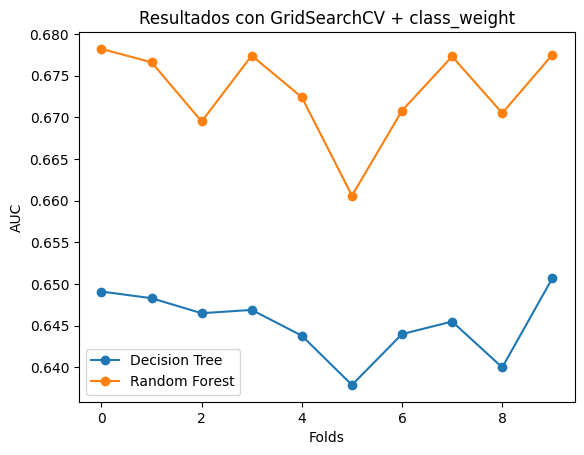

In [ ]:
# GRÁFICAS
import matplotlib.pyplot as plt

# Iterar sobre las claves y los valores de las listas results_auc
for clf_name, clf_results in results_auc6.items():
    plt.plot(range(len(clf_results)), clf_results, "o-",label=clf_name)

plt.ylabel('AUC')
plt.xlabel('Folds')
plt.title('Resultados con GridSearchCV + class_weight')
plt.legend()  #Leyenda
plt.show()

## EXTRA

In [ ]:
#pip install shap

In [ ]:
#pip install lime

In [ ]:
import lime
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

feature_names = data2.columns.tolist()
class_names = target2.unique().tolist()

data_train, data_test, target_train, target_test = train_test_split(
    data2, target2, shuffle=True, random_state=0, test_size=0.5) #mitad de los datos serán de prueba y la otra de entrenamiento

model = RandomForestClassifier()
model.fit(data_train, target_train)

explainer = lime.lime_tabular.LimeTabularExplainer(data_train, feature_names=feature_names, class_names=class_names, mode='classification')
idx = 1  # Índice de la instancia que deseas explicar
exp = explainer.explain_instance(data_test[idx], model.predict_proba, num_features=len(feature_names), top_labels=3)

In [ ]:
print(type(data_test))
print(feature_names)

<class 'pandas.core.frame.DataFrame'>
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


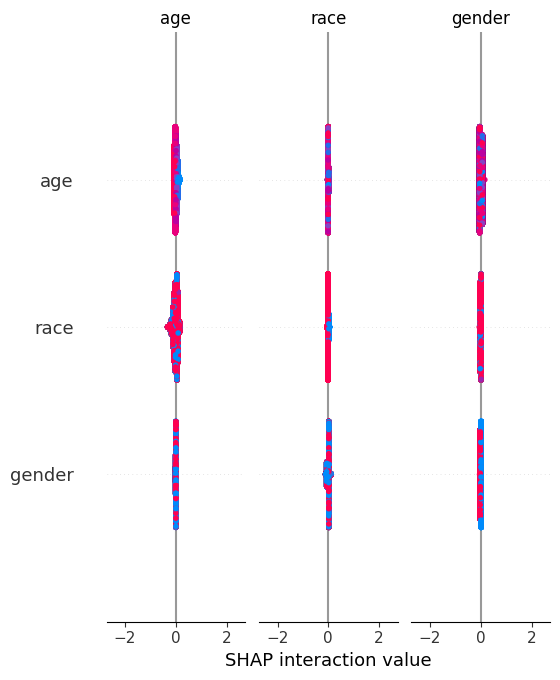

In [ ]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data2
y = target2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

# Crear un objeto explicador SHAP
explainer = shap.Explainer(model, X_test)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test)

# Visualizar los resultados (por ejemplo, un gráfico de resumen SHAP)
shap.summary_plot(shap_values, X_test, feature_names=data2.columns)